#Curso Machine Learning - PET Computação

Olá! Seja bem-vindos ao mundo de Machine Learning!

Neste Notebook iremos trabalhar com um dos desafios mais populares de Machine Learning que é o Titanic, aonde iremos tentar prever se determinado passageiro irá sobreviver ou não.

Utilizamos este notebook, devido que utilizamos diversas práticas no processo de análise dados, desde do processo de **Análise Explorátoria de Dados**, **Tratamento de Dados** e o **Modelo de Machine Learning**!

Antes de explorar essa universo, vamos entender um pouco sobre os nossos dados:

Dicionário de Dados:
Variável - Significado - Valor
* Survival -	Sobrevivente	0 = Não, 1 = Sim
* pclass	-	Classe do Ticket - 1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Clase
* sex	 - Sexo	
* Age	-  Idade em anos	
* sibsp	- Número de Irmãos/ Esposas no titanic
* parch	 - Número de pais e filhos no titanic	
* ticket	- Número do Ticket
* fare - Tarifa
* cabin	 - Número da Cabine	
* embarked	- Local de Embarque	C = Cherbourg, Q = Queenstown, S = Southampton

## Carregando Bibilotecas e o nosso Dataframe.

In [ ]:
import pandas as pd #biblioteca para processamento e tratamento de dados
import numpy as np #biblioteca para lidar com números
import matplotlib.pyplot as plt # biblioteca para visualização de dados
import seaborn as sns # biblioteca para visualização de dados

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('train.csv') #carregando nosso dataframe em uma variavel chamada df

In [ ]:
df.head() # Visualizando as 5 primeiras fileiras

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info() # Informações sobre os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Análise Explorátoria de Dados (AED OU EDA)

Este é o processo na qual buscamos entender um pouco dos nossos dados através da visualização dos mesmos!

Vou utilizar a biblioteca seaborn pela facilidade de plotar gráficos.

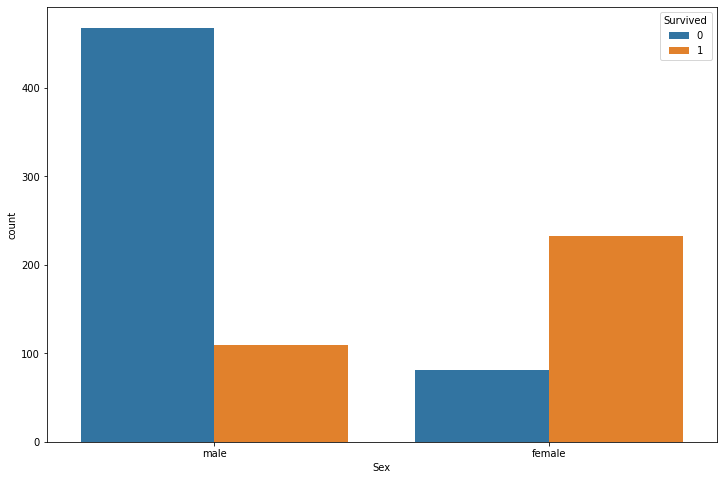

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Sex', data = df, hue = 'Survived')

plt.show()

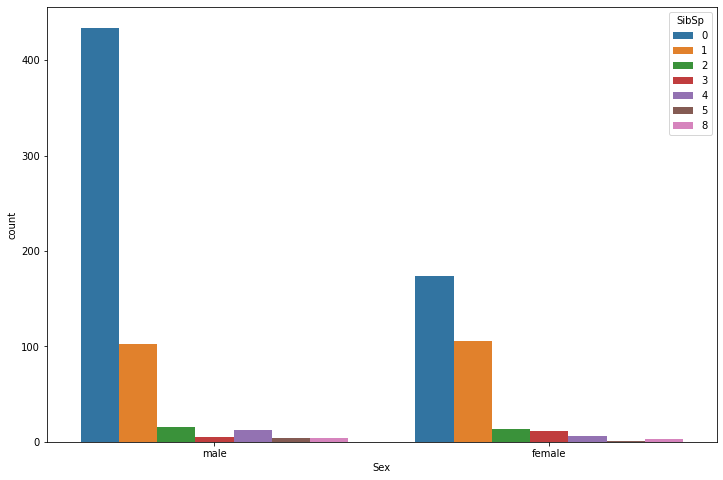

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Sex', data = df, hue = 'SibSp')

plt.show()

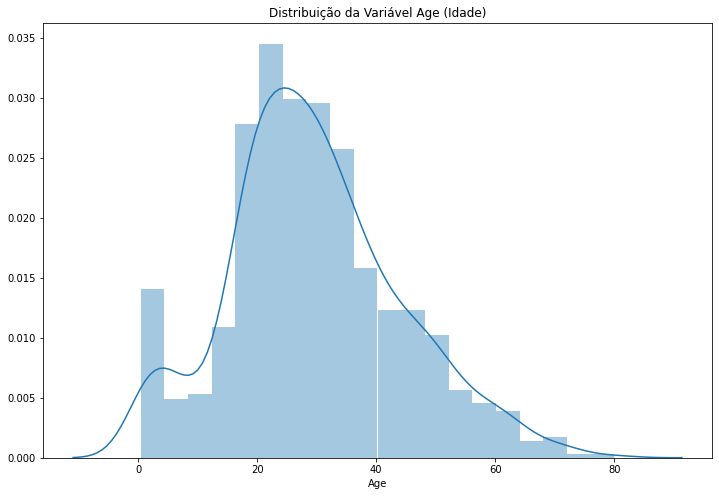

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df['Age'])
plt.title("Distribuição da Variável Age (Idade)")
plt.show()

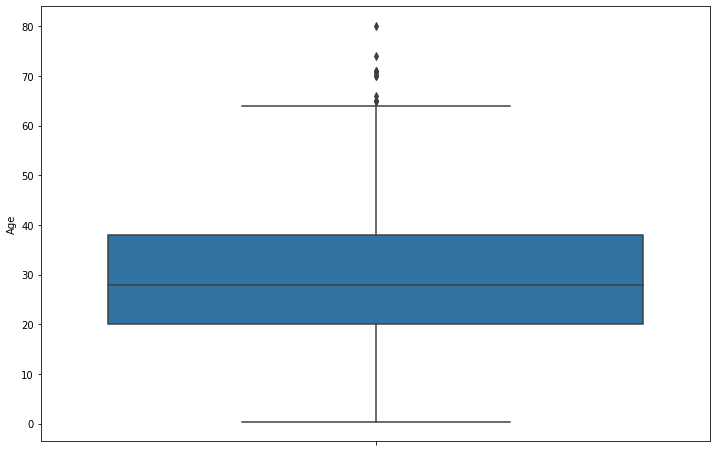

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot('Age', data = df,orient = 'v')
plt.show()

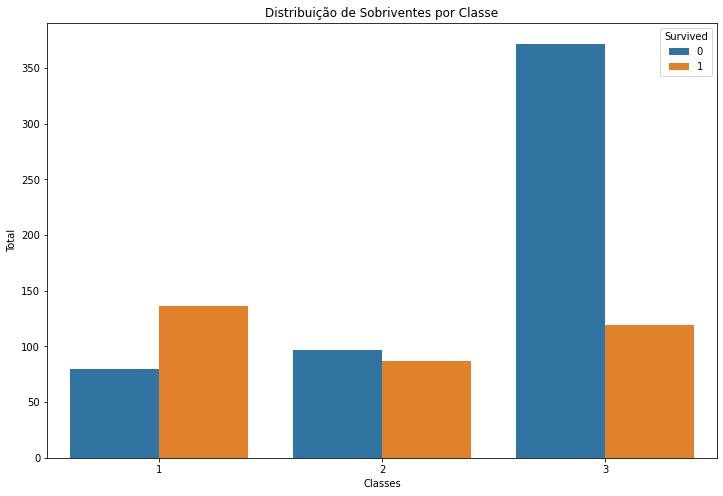

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Pclass', data = df, hue = 'Survived')
plt.title('Distribuição de Sobriventes por Classe')
plt.xlabel('Classes')
plt.ylabel('Total')
plt.show()

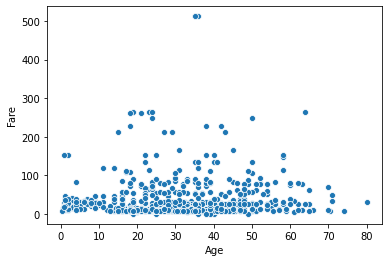

In [ ]:
sns.scatterplot(y = 'Fare', x = 'Age', data = df)
plt.show()

In [ ]:
correlacao = df.corr()
correlacao

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


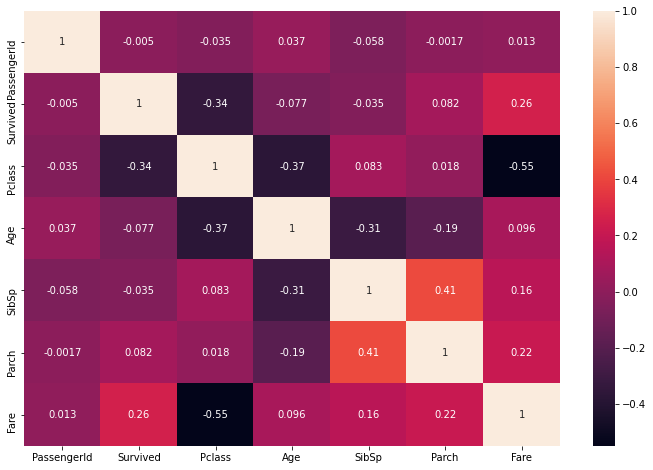

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(correlacao, annot = True)
plt.show()

## Preprocessamento e Tratamento de Dados

Aqui vamos manipular nossos dados, com a finalidade extrair novas informações sobre os dados que já conhemos e trata-los, como por exemplo preenchendo valores ausêntes.

Para preencher dados ausêntes temos três soluções ( para valores númericos):
1. Preencher com a Média;
2. Preencher com a Moda;
3. Preencher com a Mediana;

Para valores categóricos:
1. Preencher com o valor mais frequente
2. Preencher como  uma nova categória, por exemplo, Desconhecido ou Ausente.


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Preenchendo os valores da Variável Age (Idade)
moda_idade = int(df['Age'].mode())
df['Age'] = df['Age'].fillna(moda_idade)

In [ ]:
## Preencher os valores das  Cabines
_desconhecido = 'Unkown'
df['Cabin'] = df['Cabin'].fillna(_desconhecido)

### Engenheria de Features

Basicamente, transformar nossos dados já conhecidos, em novas informações!

In [ ]:
def categoria_idades(idade):
  resultado = ''
  if -1 < idade <= 0:
    resultado = 'Unkown'
  elif 0 < idade <= 5:
    resultado = 'Infant'
  elif 5 < idade <= 10:
    resultado = 'Child'
  elif 10 < idade <= 18:
    resultado = 'Teenager'
  elif 18 < idade <= 35:
    resultado = 'Young Adult'
  elif 35 < idade <= 60:
    resultado = 'Adult'
  else:
    resultado = 'Senior'
  return resultado 

df['Categories_Age'] = df['Age'].apply(categoria_idades) 

In [ ]:
df['Categories_Age'].value_counts()

Young Adult    535
Adult          195
Teenager        75
Infant          44
Senior          22
Child           20
Name: Categories_Age, dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Categories_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unkown,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unkown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unkown,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unkown,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,Unkown,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult


#### Elinando colunas

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Categories_Age'],
      dtype='object')

In [ ]:
_columns_to_drop = [
                    'PassengerId', 'Name','Ticket','Cabin'
]

df = df.drop(_columns_to_drop, axis = 1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Categories_Age_Adult,Categories_Age_Child,Categories_Age_Infant,Categories_Age_Senior,Categories_Age_Teenager,Categories_Age_Young Adult
0,0,3,male,22.0,1,0,7.2500,S,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,0,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,0,0,0,1
888,0,3,female,24.0,1,2,23.4500,S,0,0,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,0,0,0,0,0,1


#### LabelEncoder x OneHotEncoder

LabelEncoder: Mapeia o valor catégorico em um valor númerico
Exemplo:
* Young Adult = 0,
* Adult = 1,
* Infanto = 2,
...
.


OneHotEncoder ou Dummies : Ele pega a categoria e gera uma nova coluna, contento 1 ou 0.
1 para é o valor da categoria e **0** para o valor que não pertence a esta categoria.

Exemplo:
Young Adult é uma nova coluna, com 0's e 1's,
Adult é uma nova coluna, com 0's e 1's.






In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
le = LabelEncoder()

df['_categories_label'] = le.fit_transform(df['Categories_Age'])
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Categories_Age,_categories_label
0,0,3,male,22.0,1,0,7.2500,S,Young Adult,5
1,1,1,female,38.0,1,0,71.2833,C,Adult,0
2,1,3,female,26.0,0,0,7.9250,S,Young Adult,5
3,1,1,female,35.0,1,0,53.1000,S,Young Adult,5
4,0,3,male,35.0,0,0,8.0500,S,Young Adult,5
5,0,3,male,24.0,0,0,8.4583,Q,Young Adult,5
6,0,1,male,54.0,0,0,51.8625,S,Adult,0
7,0,3,male,2.0,3,1,21.0750,S,Infant,2
8,1,3,female,27.0,0,2,11.1333,S,Young Adult,5
9,1,2,female,14.0,1,0,30.0708,C,Teenager,4


In [ ]:
df= df.drop('_categories_label',axis = 1)

In [ ]:
def create_dummies(df, column_name):
  dummie = pd.get_dummies(df[column_name], prefix = column_name)
  df = df.drop(column_name, axis = 1)
  df = pd.concat([df,dummie], axis = 1)
  return df

_columns_to_dummies = ['Embarked']

for dummie in _columns_to_dummies:
  df = create_dummies(df, dummie)


In [ ]:
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Categories_Age_Adult,Categories_Age_Child,Categories_Age_Infant,Categories_Age_Senior,Categories_Age_Teenager,Categories_Age_Young Adult,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,0,1,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,0,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,0,0,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,0,0,0,1,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,0,0,0,1,0,0,1
888,0,3,0,24.0,1,2,23.4500,0,0,0,0,0,1,0,0,1
889,1,1,1,26.0,0,0,30.0000,0,0,0,0,0,1,1,0,0


## Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('Survived', axis = 1).values
y = df['Survived'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print('O Nosso modelo tem uma acurácia de {}'.format(score * 100))

O Nosso modelo tem uma acurácia de 82.12290502793296


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print('O Nosso modelo tem uma acurácia de {}'.format(score * 100))

O Nosso modelo tem uma acurácia de 79.3296089385475


## Utilizando o nosso conjunto de test

In [ ]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Preenchendo os valores da Variável Age (Idade)
moda_idade = test['Age'].mode()
test['Age'] = test['Age'].fillna(moda_idade[0])

In [ ]:
# Preencher os dados do Embarked
_mais_frequente_embarcados = test['Embarked'].mode()
test['Embarked'] = test['Embarked'].fillna(_mais_frequente_embarcados)

In [ ]:
test['Categories_Age'] = test['Age'].apply(categoria_idades) 

In [ ]:
#extract_title = test['Name'].str.extract('([A-Za-z]+)\.', expand = False)
#test['Title'] = extract_title.map(title)

In [ ]:
_columns_to_drop = [
                     'Name','Ticket','Cabin'
]

test = test.drop(_columns_to_drop, axis = 1)

In [ ]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Categories_Age_Adult,Categories_Age_Child,Categories_Age_Infant,Categories_Age_Senior,Categories_Age_Teenager,Categories_Age_Young Adult
0,892,3,male,34.5,0,0,7.8292,Q,0,0,0,0,0,1
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,0,0
2,894,2,male,62.0,0,0,9.6875,Q,0,0,0,1,0,0
3,895,3,male,27.0,0,0,8.6625,S,0,0,0,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,21.0,0,0,8.0500,S,0,0,0,0,0,1
414,1306,1,female,39.0,0,0,108.9000,C,1,0,0,0,0,0
415,1307,3,male,38.5,0,0,7.2500,S,1,0,0,0,0,0
416,1308,3,male,21.0,0,0,8.0500,S,0,0,0,0,0,1


In [ ]:
_columns_to_dummies = ['Embarked']

for dummie in _columns_to_dummies:
 test = create_dummies(test, dummie)


In [ ]:
test['Sex'] = le.fit_transform(test['Sex'])

#### Modelo

In [ ]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Categories_Age_Adult', 'Categories_Age_Child', 'Categories_Age_Infant',
       'Categories_Age_Senior', 'Categories_Age_Teenager',
       'Categories_Age_Young Adult',
      'Embarked_C',
       'Embarked_Q', 'Embarked_S']

In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [ ]:
test_predictions = model.predict(test[columns])

Agora, vamos pegar nossos dados e submeter ao Kaggle e este foi o nosso primeiro modelo de Machine Learning!

In [ ]:
test_ids = test['PassengerId']
submission_df = {'PassengerId': test_ids, 'Survived': test_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('submission.csv',index = False)